<a href="https://colab.research.google.com/github/mdeepika12/AIML/blob/main/2313031_AIML_1stExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#code for removing missing data from the data
import pandas as pd

#Example Dataframe
data = pd.DataFrame({'A':[1,2,None,4],'B':[None,2,3,4],'C':[5,6,None,8]})
data



,A,B,C
0,1.0,NaN,5.0
1,2.0,2.0,6.0
2,NaN,3.0,NaN
3,4.0,4.0,8.0


In [ ]:
data_clean = data.dropna() #Remove rows with missing values
print(data_clean)

     A    B    C
1  2.0  2.0  6.0
3  4.0  4.0  8.0


In [ ]:
#Replace missing values with column mean
data_filled = data.fillna(data.mean())
print(data_filled)


          A    B         C
0  1.000000  3.0  5.000000
1  2.000000  2.0  6.000000
2  2.333333  3.0  6.333333
3  4.000000  4.0  8.000000


In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_filled)
print(data_scaled)

[[0.         0.5        0.        ]
 [0.33333333 0.         0.33333333]
 [0.44444444 0.5        0.44444444]
 [1.         1.         1.        ]]


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
data = pd.DataFrame({'Color':['Red','Blue','Green','Red']})

encoder = LabelEncoder()
data['Color_Label'] = encoder.fit_transform(data['Color'])
print(data)


   Color  Color_Label
0    Red            2
1   Blue            0
2  Green            1
3    Red            2


In [ ]:
#One hot encoding
data = pd.DataFrame({'Color':['Red','Blue','Green','Red']})

#pandas.get_dummies() is used for data manipulation. It converts catagorical data into dummy or indicator variables
data_onehot = pd.get_dummies(data, columns=['Color'])
print(data_onehot)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3       False        False       True


In [ ]:
#Outlier detection
from scipy import stats
import numpy as np

data = [1,2,2,2,3,11,1,15,2,2,10,3,1,1,2]
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is',mean)
print('standard deviation of the dataset is',std)


mean of the dataset is 3.8666666666666667
standard deviation of the dataset is 4.224794538067962


In [ ]:
#z score is also called standard score
#This score helps to understand is a data value is greater or smaller than mean and how far away it is from the mean values
#Calculate Z score. If Z score>3, Print it as an outlier.
threshold = 1
outlier =[]
for i in data:
    z = (i-mean)/std
    if z>threshold:
        outlier.append(i)
print('outliers are',outlier)

outliers are [11, 15, 10]


In [ ]:
#feature Engieering
import pandas as pd

#Create a Dataframe with 'Age' column
data = pd.DataFrame({'Age':[25,35,45,30]})

#Creating a new 'Age_Group' column by binning the 'Age' column
data['Age_Group'] = pd.cut(data['Age'], bins=[20,30,40,50], labels=['20-30','30-40','40-50'])

#Display the DataFrame
print(data)


   Age Age_Group
0   25     20-30
1   35     30-40
2   45     40-50
3   30     20-30


In [ ]:
#feature scaling
data['Scaled_Age'] = (data['Age'] - data['Age'].mean())/data['Age'].std()
print(data)



   Age Age_Group  Scaled_Age
0   25     20-30   -1.024695
1   35     30-40    0.146385
2   45     40-50    1.317465
3   30     20-30   -0.439155


In [ ]:
#text data processing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

corpus = ["This is a sentence.","This is another sentence."]
filtered_corpus = [''.join([word for word in text.split() if word.lower() not in ENGLISH_STOP_WORDS]) for text in corpus]

print(filtered_corpus)

['sentence.', 'sentence.']


In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = ['running','runs','ran']
stemmed_words = [ps.stem(word) for word in corpus]
print(stemmed_words)

['run', 'run', 'ran']


In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = ["This is a sentence.","This is another sentence."]
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)

print(x.toarray())

[[0.         0.57735027 0.57735027 0.57735027]
 [0.63009934 0.44832087 0.44832087 0.44832087]]


In [ ]:
data = pd.DataFrame({'A':[1,2,2,4],'B':[1,2,2,4]})
data_no_duplicates = data.drop_duplicates()
print(data_no_duplicates)

   A  B
0  1  1
1  2  2
3  4  4


In [ ]:
#train-test split
import pandas as pd
from sklearn.model_selection import train_test_split

x = pd.DataFrame({'Feature1':[1,2,3,4,5,6,7,8,9,10]})
y = pd.Series([1,0,1,0,1,1,1,0,0,1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train, x_test)
print(y_train, y_test)



   Feature1
5         6
0         1
7         8
2         3
9        10
4         5
3         4
6         7    Feature1
8         9
1         2
5    1
0    1
7    0
2    1
9    1
4    1
3    0
6    1
dtype: int64 8    0
1    0
dtype: int64


### Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("used_cars.csv")
data.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
data.tail()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [ ]:
data.isnull().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


In [ ]:
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [ ]:
#remove S.no from column from data
data = data.drop('S.No.', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [ ]:
date.today()

datetime.date(2024, 11, 29)

In [ ]:
date.today().month

11

In [ ]:
date.today().year

2024

In [ ]:
from datetime import date
date.today().year
data['Car_Age'] = date.today().year - data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


In [ ]:
#Let's split the name and introduce new variables "Brand" and "Model"
data['Brand'] = data['Name'].str.split(' ').str.get(0)
data['Model'] = data['Name'].str.split(' ').str.get(1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11,Audi,A4


In [ ]:
data['Brand'] = data['Name'].str.split(' ').str.get(0)
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)
data['Variant'] = data.Name.str.split().str.get(3)

data[['Name','Brand','Model','Variant']]

,Name,Brand,Model,Variant
0,Maruti Wagon R LXI CNG,Maruti,WagonR,LXI
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6,CRDi
2,Honda Jazz V,Honda,JazzV,NaN
3,Maruti Ertiga VDI,Maruti,ErtigaVDI,NaN
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New,2.0
...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel,Trendline
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT,TSI
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel,XV
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT,TSI


In [ ]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [ ]:
searchfor = ['Isuzu','ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,Rover
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,Rover
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,Countryman
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,Rover
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,Cooper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,NaN,7,ISUZU,D-MAX
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,44.59 Lakh,NaN,7,Mini,Clubman
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,NaN,9,Land,Rover
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,NaN,11,Mini,Cooper


In [ ]:
data["Brand"].replace({"ISUZU":"Isuzu","Mini":"Mini Cooper","Land":"Land Rover"},inplace=True)
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda'
 'Mini Cooper' 'Fiat' 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'Force'
 'Bentley' 'Lamborghini' 'Hindustan' 'OpelCorsa']
32


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7253.0,10.634634,3.254421,5.00,8.0,10.00,13.00,28.0


In [ ]:
data.describe()

,Year,Kilometers_Driven,Seats,Price,Car_Age
count,7253.000000,7.253000e+03,7200.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468,10.634634
std,3.254421,8.442772e+04,0.811660,11.187917,3.254421
min,1996.000000,1.710000e+02,0.000000,0.440000,5.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,8.000000
50%,2014.000000,5.341600e+04,5.000000,5.640000,10.000000
75%,2016.000000,7.300000e+04,5.000000,9.950000,13.000000
max,2019.000000,6.500000e+06,10.000000,160.000000,28.000000


In [ ]:
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000,7253.000000,7253,7253
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN,NaN,32,219
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,63.71 Lakh,NaN,NaN,Maruti,Swift
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN,NaN,1444,418
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468,10.634634,NaN,NaN
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917,3.254421,NaN,NaN
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000,5.000000,NaN,NaN
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000,8.000000,NaN,NaN
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000,10.000000,NaN,NaN
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000,13.000000,NaN,NaN


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7207,386,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Catagorical Variables")
print(cat_cols)
print("Numerical Variables")
print(num_cols)

Catagorical Variables
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model']
Numerical Variables
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


Year
Skew: -0.84


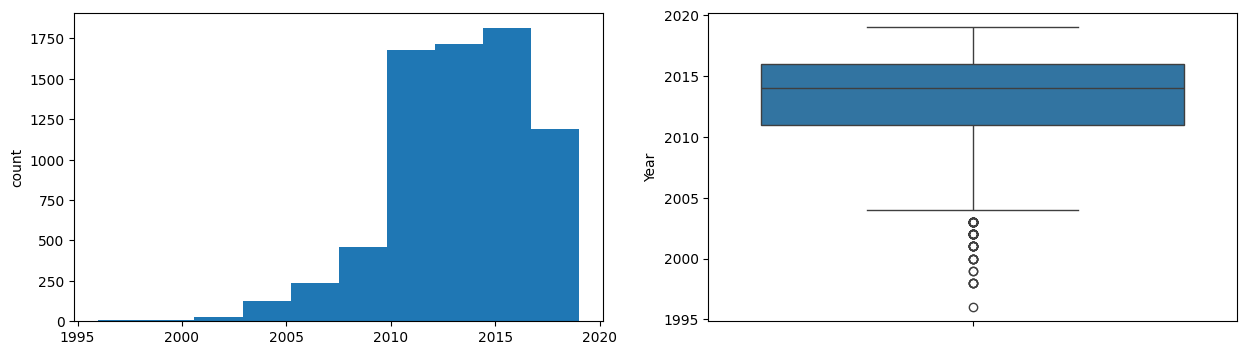

Kilometers_Driven
Skew: 61.58


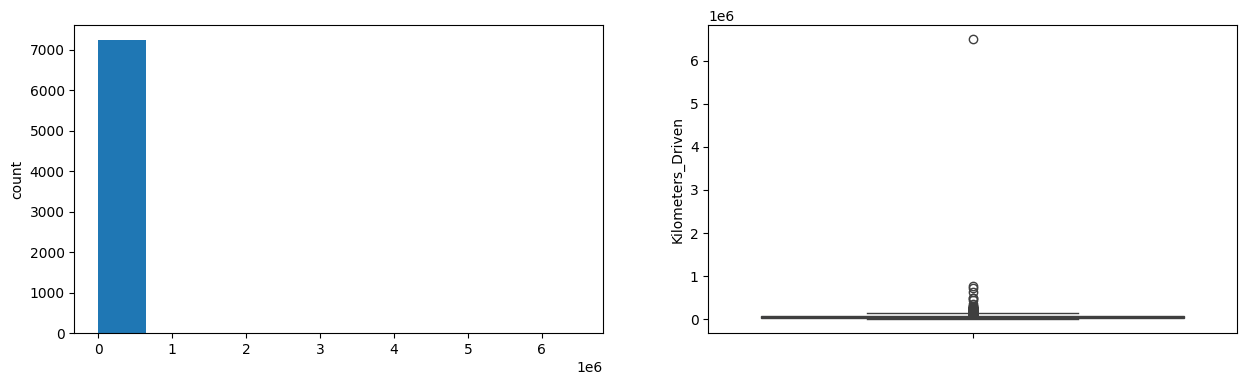

Seats
Skew: 1.9


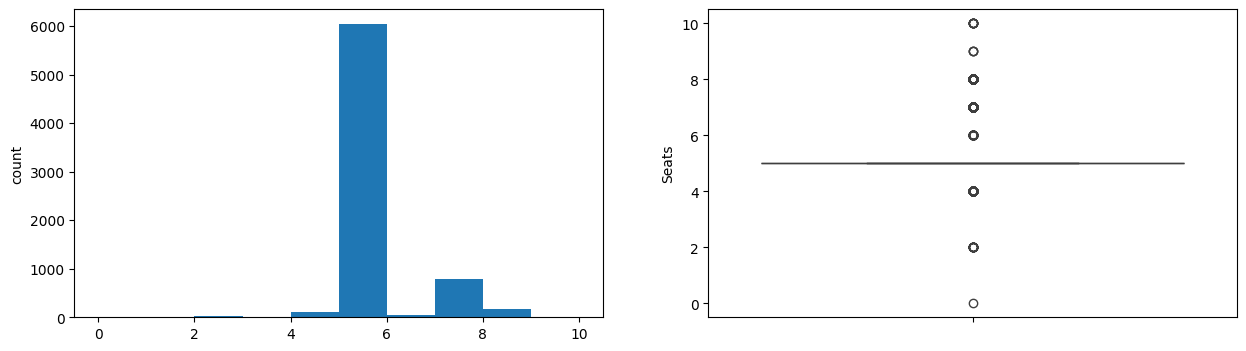

Price
Skew: 3.34


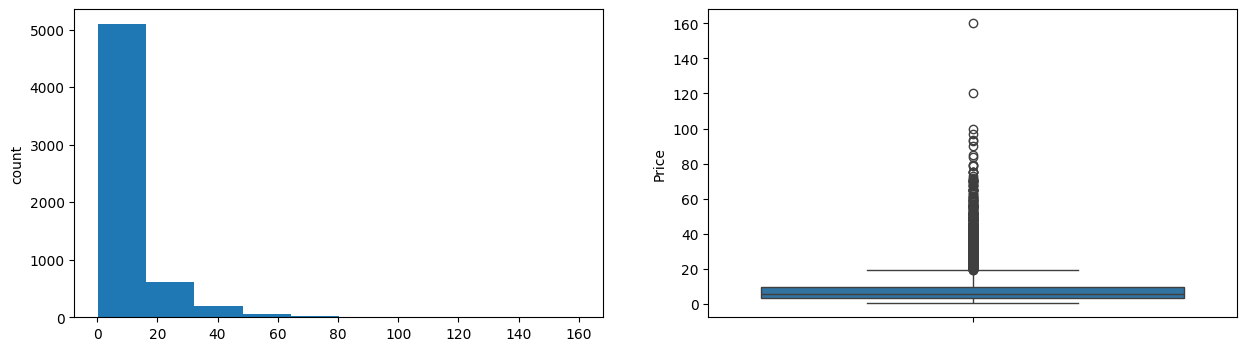

Car_Age
Skew: 0.84


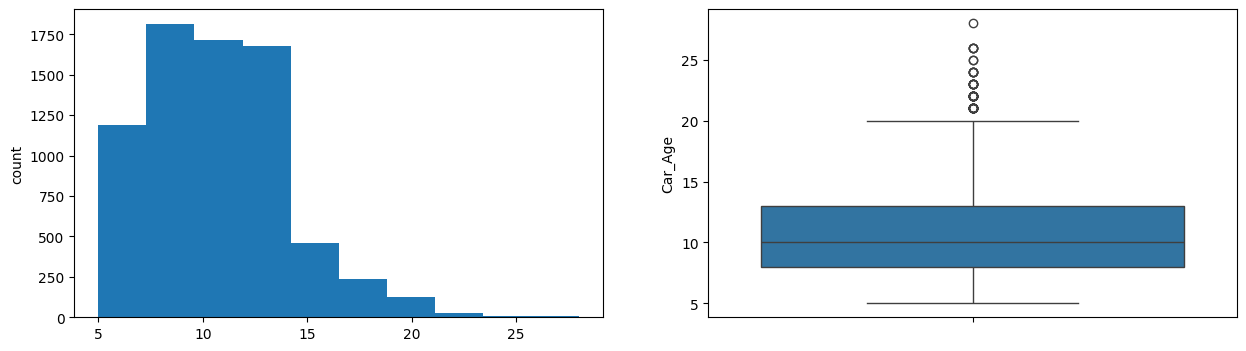

In [ ]:
for col in num_cols:
    print(col)
    print('Skew:',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.show()

Catagorical Data Analysis

In [ ]:
fig, axes =